# 2017331026
# Here I represent Lab 4 tasks for KNN,Decision Tree and Random Forest,Single  and Multi Layer Neural Network :


# **TASK 1:**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

we showed data visualization with 2 features in SVM part

In [ ]:
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris()

# we will use petal length and petal width features
X = iris["data"][:, (2, 3)]

Y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
def assess(classifier,input_data,target_data,prediction) :
  print()
  print('confusion matrix : \n')
  print(confusion_matrix(target_data, prediction))
  plot_confusion_matrix(classifier, input_data, target_data)  
  plt.show()
  print()

In [ ]:
import numpy as np
h = 0.02

x_min=X_train[:, 0].min() - 1
x_max =X_train[:, 0].max() + 1


y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

def Decision_Boundary(xx,yy,model): 
  plt.figure(figsize=(10,10))
  
  #  Z is the prediction
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)

  plt.xlabel('Petal length')
  plt.ylabel('Petal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.show()
      

# **TASK 2:**

# For KNN:

accuracy score (k=5) : 94.73684210526315

confusion matrix : 

[[ 7  0  0]
 [ 0 18  1]
 [ 0  1 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


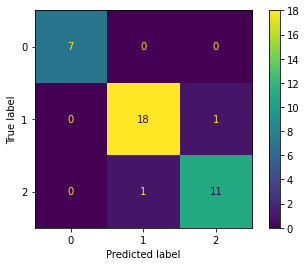

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
pred_knn = knn.predict(X_test)
print('accuracy score (k=5) : ' + str(accuracy_score(Y_test, pred_knn)*100.0))
assess(knn,X_test,Y_test,pred_knn)

# For Single Layer NN:

accuracy score (single layer) : 50.0


confusion matrix : 

[[ 7  0  0]
 [ 0  0 19]
 [ 0  0 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


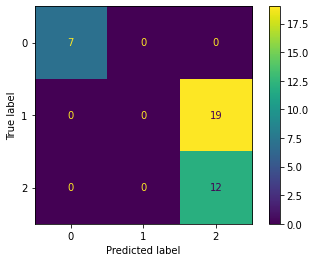

In [ ]:
single_layer_nn = MLPClassifier( hidden_layer_sizes=(),max_iter=100,activation='logistic',learning_rate_init=0.01,solver='sgd')
single_layer_nn.fit(X_train,Y_train)
pred_s_nn = single_layer_nn.predict(X_test)
print('accuracy score (single layer) : ' + str(accuracy_score(Y_test, pred_s_nn)*100.0))

print()

assess(single_layer_nn,X_test,Y_test,pred_s_nn)



# For MultiLayer NN:

accuracy score (multi layer) : 84.21052631578947

confusion matrix : 

[[ 7  0  0]
 [ 0  0 19]
 [ 0  0 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


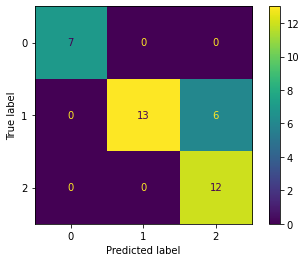

In [ ]:
multi_layer_nn = MLPClassifier( hidden_layer_sizes=(4,4),max_iter=400,activation='logistic',learning_rate_init=0.1,solver='sgd',batch_size=15)
multi_layer_nn.fit(X_train,Y_train)
pred_m_nn = multi_layer_nn.predict(X_test)
print('accuracy score (multi layer) : ' + str(accuracy_score(Y_test, pred_m_nn)*100.0))

assess(multi_layer_nn,X_test,Y_test,pred_s_nn)


# For Decision Tree:

accuracy score (Decision Tree) : 94.73684210526315


confusion matrix : 

[[ 7  0  0]
 [ 0 18  1]
 [ 0  1 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


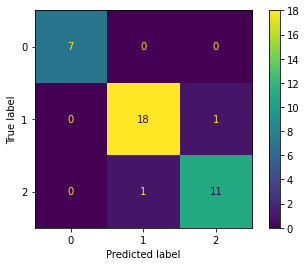

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree.fit(X_train,Y_train)
pred_dtree = dtree.predict(X_test)
print('accuracy score (Decision Tree) : ' + str(accuracy_score(Y_test, pred_dtree)*100.0))

print()

assess(dtree,X_test,Y_test,pred_dtree)


# For Random Forest:

accuracy score (Random Forest) : 97.36842105263158


confusion matrix : 

[[ 7  0  0]
 [ 0 18  1]
 [ 0  0 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


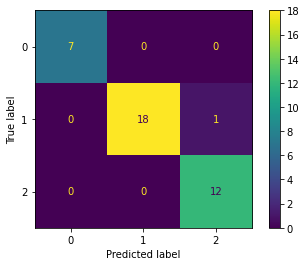

In [ ]:
rforest = RandomForestClassifier(max_depth=2, random_state=0)
rforest.fit(X_train,Y_train)
pred_rforest = rforest.predict(X_test)
print('accuracy score (Random Forest) : ' + str(accuracy_score(Y_test, pred_rforest)*100.0))

print()

assess(rforest,X_test,Y_test,pred_rforest)


# **TASK 3:**

# Decision Boundary For KNN:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()


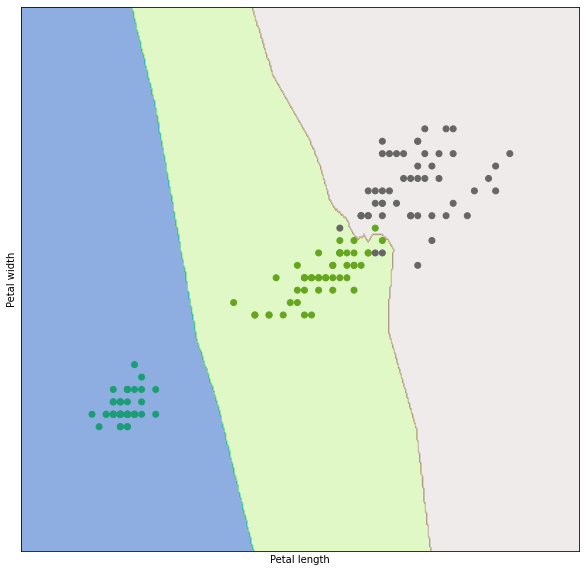

In [ ]:
Decision_Boundary(xx,yy,knn)

# Decision Boundary For Single Layer NN:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()


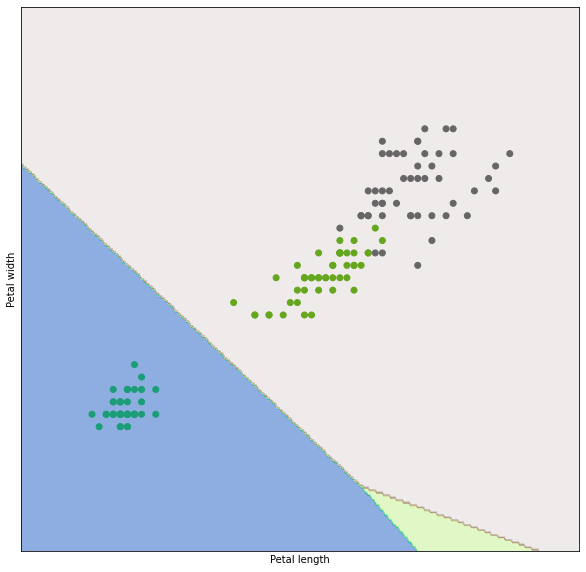

In [ ]:
Decision_Boundary(xx,yy,single_layer_nn)

# Decision Boundary For MultiLayer NN:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()


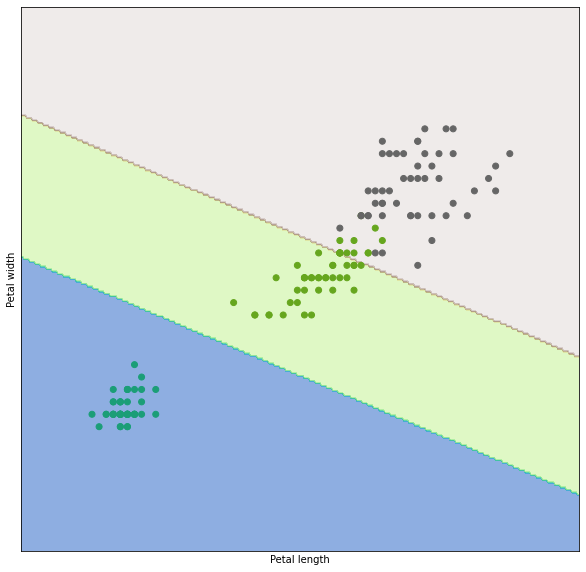

In [ ]:

Decision_Boundary(xx,yy,multi_layer_nn)

# Decision Boundary For Decision Tree

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()


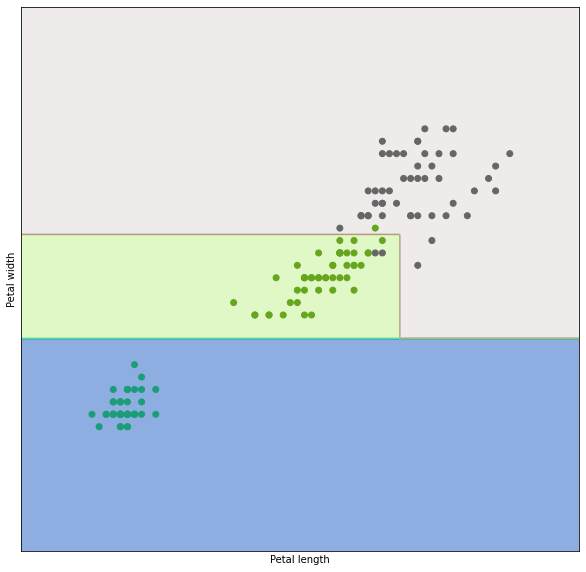

In [ ]:
Decision_Boundary(xx,yy,dtree)

# Decision Boundary For Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()


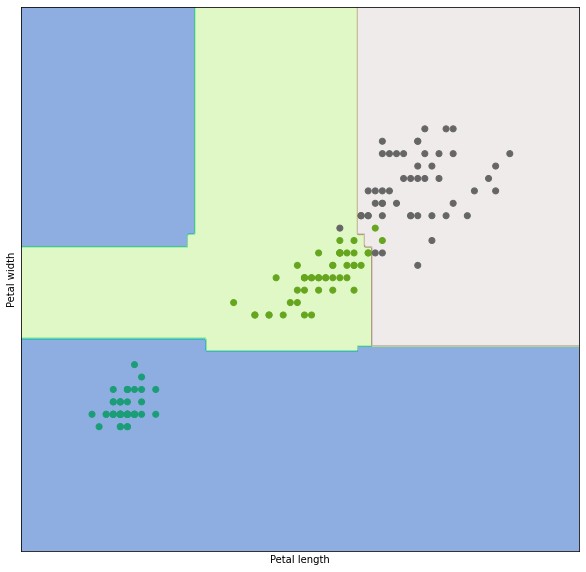

In [ ]:
Decision_Boundary(xx,yy,rforest)

# **TASK 4:**

# For Tuning Hyper-Parameter of KNN:

In [ ]:
knn_h = KNeighborsClassifier(n_neighbors=2)
parameter_space_knn = {
    'n_neighbors': [2, 3]

}
from sklearn.model_selection import GridSearchCV
clf_knn = GridSearchCV(knn_h, parameter_space_knn, n_jobs=-1, cv=5)
clf_knn.fit(X_train, Y_train)




GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3]})

In [ ]:
print('Best parameters :\n', clf_knn.best_params_)

Best parameters :
 {'n_neighbors': 2}


In [ ]:
y_true, y_pred = Y_test , clf_knn.predict(X_test)
from sklearn.metrics import classification_report
print('Different metrics result on the test set:')
print(classification_report(y_true, y_pred))

Different metrics result on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.97      0.97      0.97        38



# For Tuning Hyper-Parameter of Single Layer NN:

In [ ]:
mlp_sl = MLPClassifier()
parameter_space1 = {
    'hidden_layer_sizes': [()],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'batch_size':[15,30]
}
from sklearn.model_selection import GridSearchCV
clf_sl = GridSearchCV(mlp_sl, parameter_space1, n_jobs=-1, cv=5)
clf_sl.fit(X_train, Y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05], 'batch_size': [15, 30],
                         'hidden_layer_sizes': [()],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters :\n', clf_sl.best_params_)

Best parameters :
 {'activation': 'tanh', 'alpha': 0.05, 'batch_size': 15, 'hidden_layer_sizes': (), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [ ]:
y_true, y_pred = Y_test , clf_sl.predict(X_test)
from sklearn.metrics import classification_report
print('Different metrics result on the test set:')
print(classification_report(y_true, y_pred))

Different metrics result on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00        19
           2       0.39      1.00      0.56        12

    accuracy                           0.50        38
   macro avg       0.46      0.67      0.52        38
weighted avg       0.31      0.50      0.36        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# For Tuning Hyper-Parameter of Multi Layer NN:

In [ ]:
mlp_gs = MLPClassifier(max_iter=200)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters :\n', clf.best_params_)

Best parameters :
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
y_true, y_pred = Y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Different Mertrics Results on the test set:')
print(classification_report(y_true, y_pred))

Different Mertrics Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.95      0.95      0.95        19
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



# For Tuning Hyper-Parameter of Decision Tree:

In [ ]:
dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
parameter_space_dt = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,3]
}
from sklearn.model_selection import GridSearchCV
clf_dt = GridSearchCV(dtree, parameter_space_dt, n_jobs=-1, cv=5)
clf_dt.fit(X_train, Y_train) 

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 3],
                         'splitter': ['best', 'random']})

In [ ]:
print('Best parameters :\n', clf_dt.best_params_)

Best parameters :
 {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}


In [ ]:
y_true, y_pred = Y_test , clf_dt.predict(X_test)
from sklearn.metrics import classification_report
print('Different Mertrics Results on the test set:')
print(classification_report(y_true, y_pred))

Different Mertrics Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.95      0.97        19
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



# **TASK 5:**

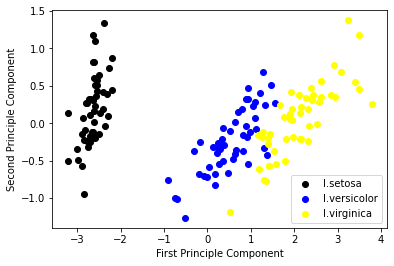

In [ ]:
# Again Loading the Dataset for removing overlapping of different variables

from sklearn.datasets import load_iris
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris=load_iris()
features=iris.data
labels=iris.target
iris = datasets.load_iris()
y = iris.target
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']

from sklearn.decomposition import PCA
est=PCA(n_components=2)
x_pca=est.fit_transform(features)

colors=['black', 'blue','yellow']
for i in range(len(colors)):
    px=x_pca[:,0][labels==i]
    py=x_pca[:,1][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()



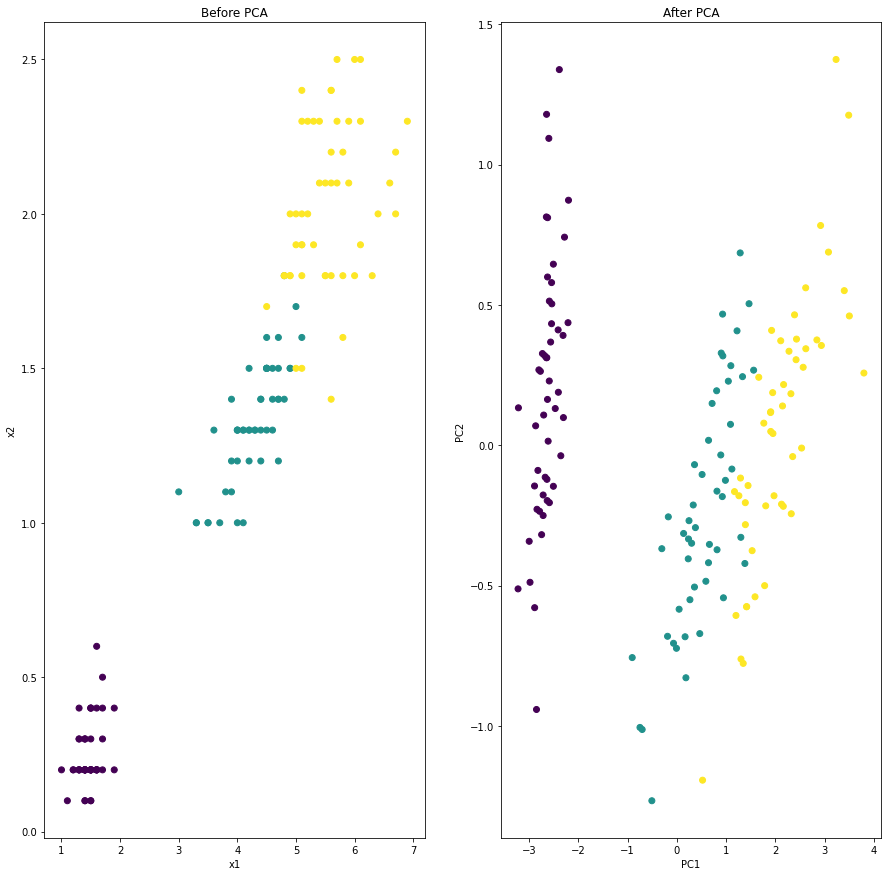

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
# fig.figure(figsize=(15,15))
axes[0].scatter(X[:,0], X[:,1],c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_pca[:,0], x_pca[:,1],c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_pca, labels, test_size=0.4, random_state=33)

# PCA on KNN:

In [ ]:

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(x_train, y_train)

predknn = knn_pca.predict(x_test)


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
print('Accuracy Score:', accuracy_score(y_test, predknn))
print('Confusion Matrix:\n', confusion_matrix(y_test, predknn))
print(metrics.classification_report(
    y_test, predknn, target_names=labels_names))


Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[17  0  0]
 [ 0 19  1]
 [ 0  1 22]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.95      0.95      0.95        20
 I.virginica       0.96      0.96      0.96        23

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



# PCA on Single Layer NN:

In [ ]:

clf_sl=MLPClassifier(hidden_layer_sizes=(),max_iter=100,activation='logistic',learning_rate_init=0.01,solver='sgd')
clf_sl.fit(x_train, y_train)

pred = clf_sl.predict(x_test)


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
print('Accuracy Score:', accuracy_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))
print(metrics.classification_report(
    y_test, pred, target_names=labels_names))


Accuracy Score: 0.8666666666666667
Confusion Matrix:
 [[17  0  0]
 [ 0 14  6]
 [ 0  2 21]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.88      0.70      0.78        20
 I.virginica       0.78      0.91      0.84        23

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.87      0.87      0.86        60



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# PCA on Multi Layer NN:

In [ ]:
from sklearn.svm import SVC
clf=MLPClassifier( hidden_layer_sizes=(4,4),max_iter=400,activation='logistic',learning_rate_init=0.1,solver='sgd',batch_size=15)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
print('Accuracy Score:', accuracy_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))
print(metrics.classification_report(
    y_test, pred, target_names=labels_names))




# from sklearn import metrics
# print(metrics.classification_report(
#     y_test, pred, target_names=labels_names))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[17  0  0]
 [ 0 20  0]
 [ 0  2 21]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.91      1.00      0.95        20
 I.virginica       1.00      0.91      0.95        23

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



# PCA For Decision Tree:

In [ ]:
dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree.fit(x_train, y_train)

pred = dtree.predict(x_test)


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
print('Accuracy Score:', accuracy_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))
print(metrics.classification_report(
    y_test, pred, target_names=labels_names))


Accuracy Score: 0.9333333333333333
Confusion Matrix:
 [[17  0  0]
 [ 0 20  0]
 [ 0  4 19]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.83      1.00      0.91        20
 I.virginica       1.00      0.83      0.90        23

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



# PCA For Random Forest:

In [ ]:
rforest = RandomForestClassifier(max_depth=4, random_state=0)
rforest.fit(x_train,y_train)

predr = rforest.predict(x_test)


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
print('Accuracy Score:', accuracy_score(y_test, predr))
print('Confusion Matrix:\n', confusion_matrix(y_test, predr))
print(metrics.classification_report(
    y_test, predr, target_names=labels_names))


Accuracy Score: 0.9166666666666666
Confusion Matrix:
 [[17  0  0]
 [ 0 18  2]
 [ 0  3 20]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.86      0.90      0.88        20
 I.virginica       0.91      0.87      0.89        23

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

